In [1]:
import pandas as pd
import numpy as np


train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

valid_columns = ["timestep", "location", "traffic"]
train_df = train_df[valid_columns]
test_df = test_df[valid_columns]
display(train_df[train_df["timestep"] == 2].head())
display(test_df.head())

timestep  location   traffic
72         2         0  0.044839
73         2         1  0.052312
74         2         2  0.050444
75         2         3  0.051378
76         2         4  0.056516

timestep  location   traffic
0         0         0  0.401681
1         0         1  0.573097
2         0         2  0.397011
3         0         3  0.463335
4         0         4  0.284914

In [2]:
train_df['timestep'] = pd.to_datetime(train_df['timestep']*15, unit='m', origin='2023-01-01 00:00:00')
test_df['timestep'] = pd.to_datetime(test_df['timestep']*15, unit='m', origin='2023-01-01 00:00:00')

<ipython-input-2-15b48941b1ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['timestep'] = pd.to_datetime(train_df['timestep']*15, unit='m', origin='2023-01-01 00:00:00')


In [3]:
train_df = train_df.pivot(index='timestep', columns='location', values='traffic').fillna(0)
# Rename columns for clarity (optional but recommended)
train_df.columns = [f'traffic_{loc}' for loc in train_df.columns]


test_df = test_df.pivot(index='timestep', columns='location', values='traffic').fillna(0)
# Rename columns for clarity (optional but recommended)
test_df.columns = [f'traffic_{loc}' for loc in test_df.columns]

In [4]:
replacement_value = 0.0004670714619336
test_df = test_df.replace(0.0, replacement_value)
train_df = train_df.replace(0.0, replacement_value)

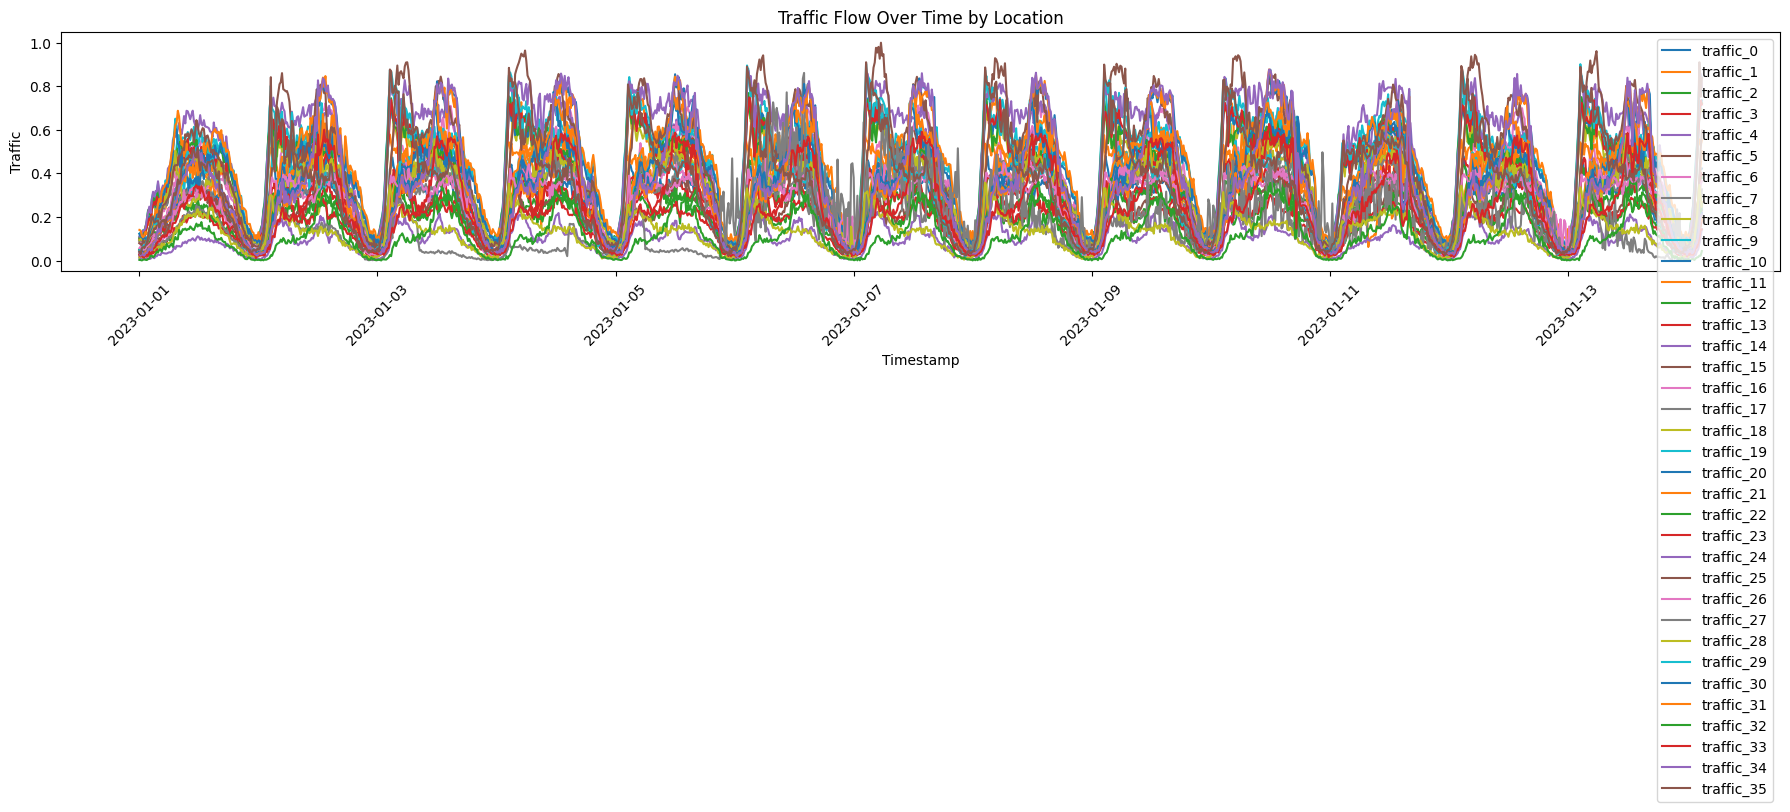

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization: Traffic Over Time by Location
fig, ax = plt.subplots(figsize=(18, 6))

for location in train_df.columns:
    ax.plot(train_df.index, train_df[location], label=location)

ax.set_xlabel("Timestamp")
ax.set_ylabel("Traffic")
ax.set_title("Traffic Flow Over Time by Location")
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
ax.legend()
fig.tight_layout()  # Adjust layout
plt.show()


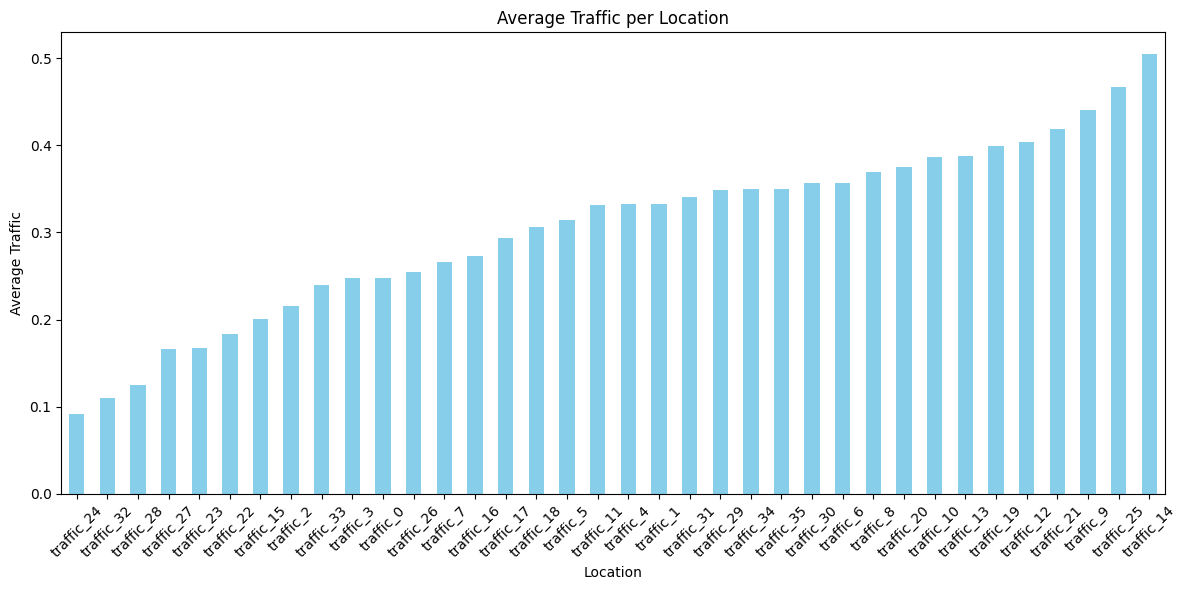

In [6]:
# Bar plot: Average traffic per location
avg_traffic = train_df.mean()

plt.figure(figsize=(12, 6))
avg_traffic.sort_values().plot(kind='bar', color='skyblue')
plt.title("Average Traffic per Location")
plt.xlabel("Location")
plt.ylabel("Average Traffic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


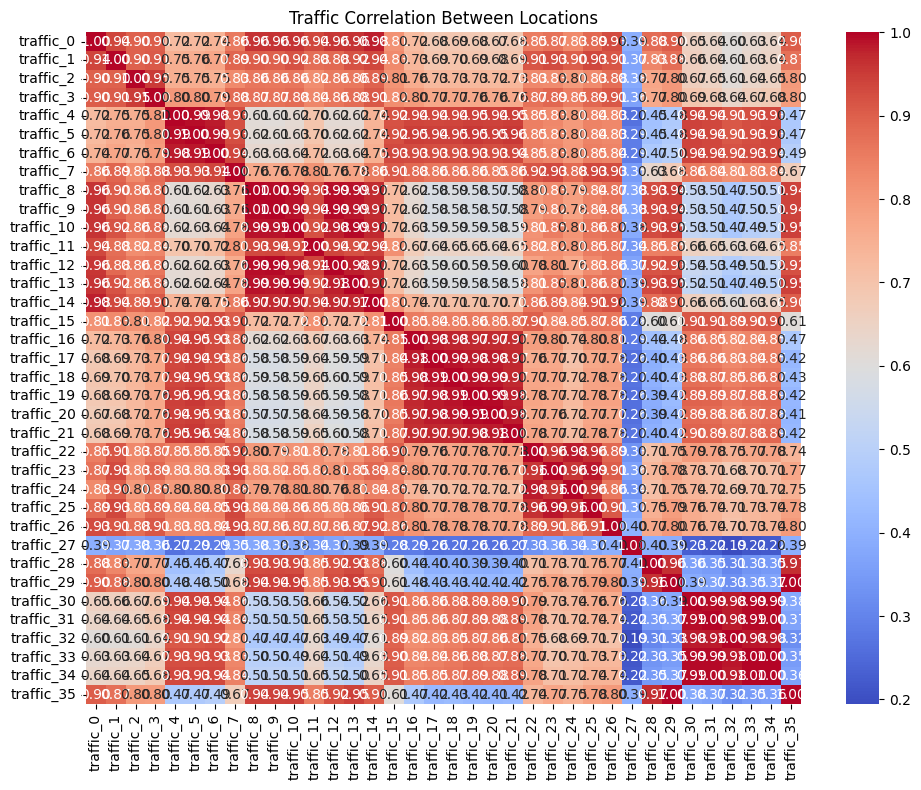

In [7]:
import seaborn as sns

# Heatmap: Correlation between locations
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Traffic Correlation Between Locations")
plt.tight_layout()
plt.show()


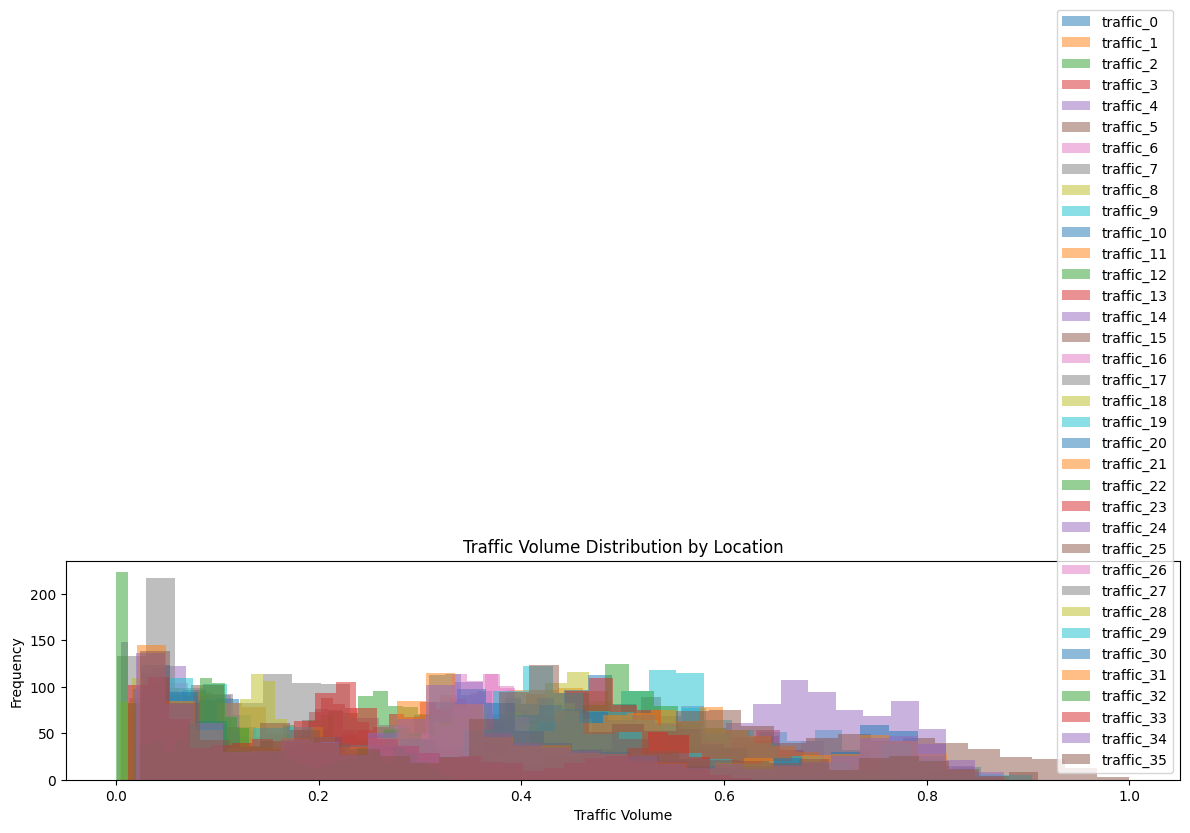

In [8]:
# Histogram: Distribution of traffic volumes
plt.figure(figsize=(12, 6))

for location in train_df.columns:
    plt.hist(train_df[location], bins=30, alpha=0.5, label=location)

plt.title("Traffic Volume Distribution by Location")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x1800 with 0 Axes>

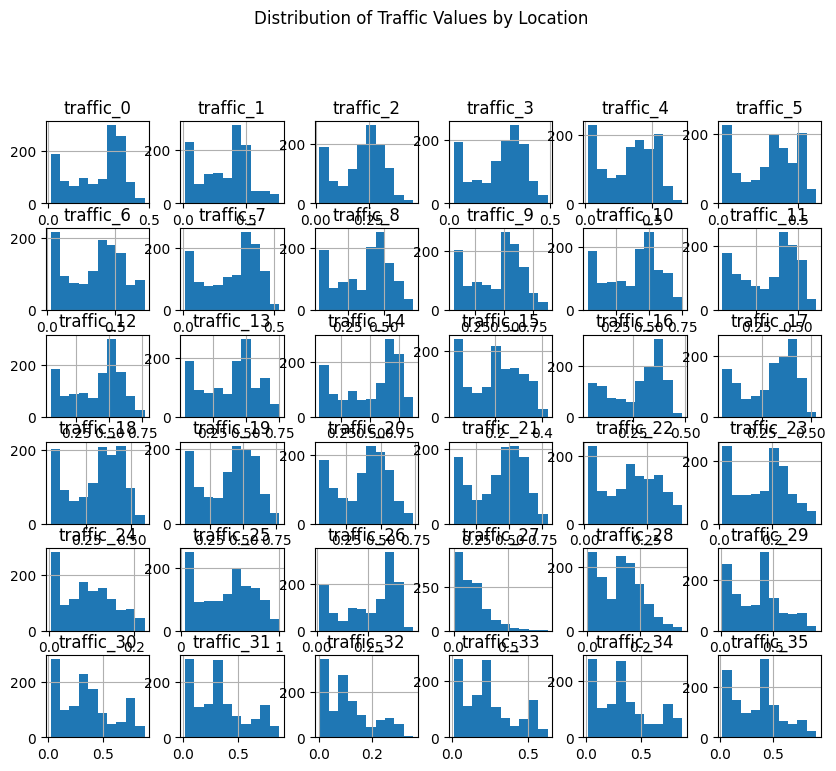

In [9]:
plt.figure(figsize=(12, 18))  # Adjust figure size as needed


train_df.hist(figsize=(10, 8))
plt.suptitle("Distribution of Traffic Values by Location", y=1.02)
plt.show()

# # Moving average smoothing to see trend

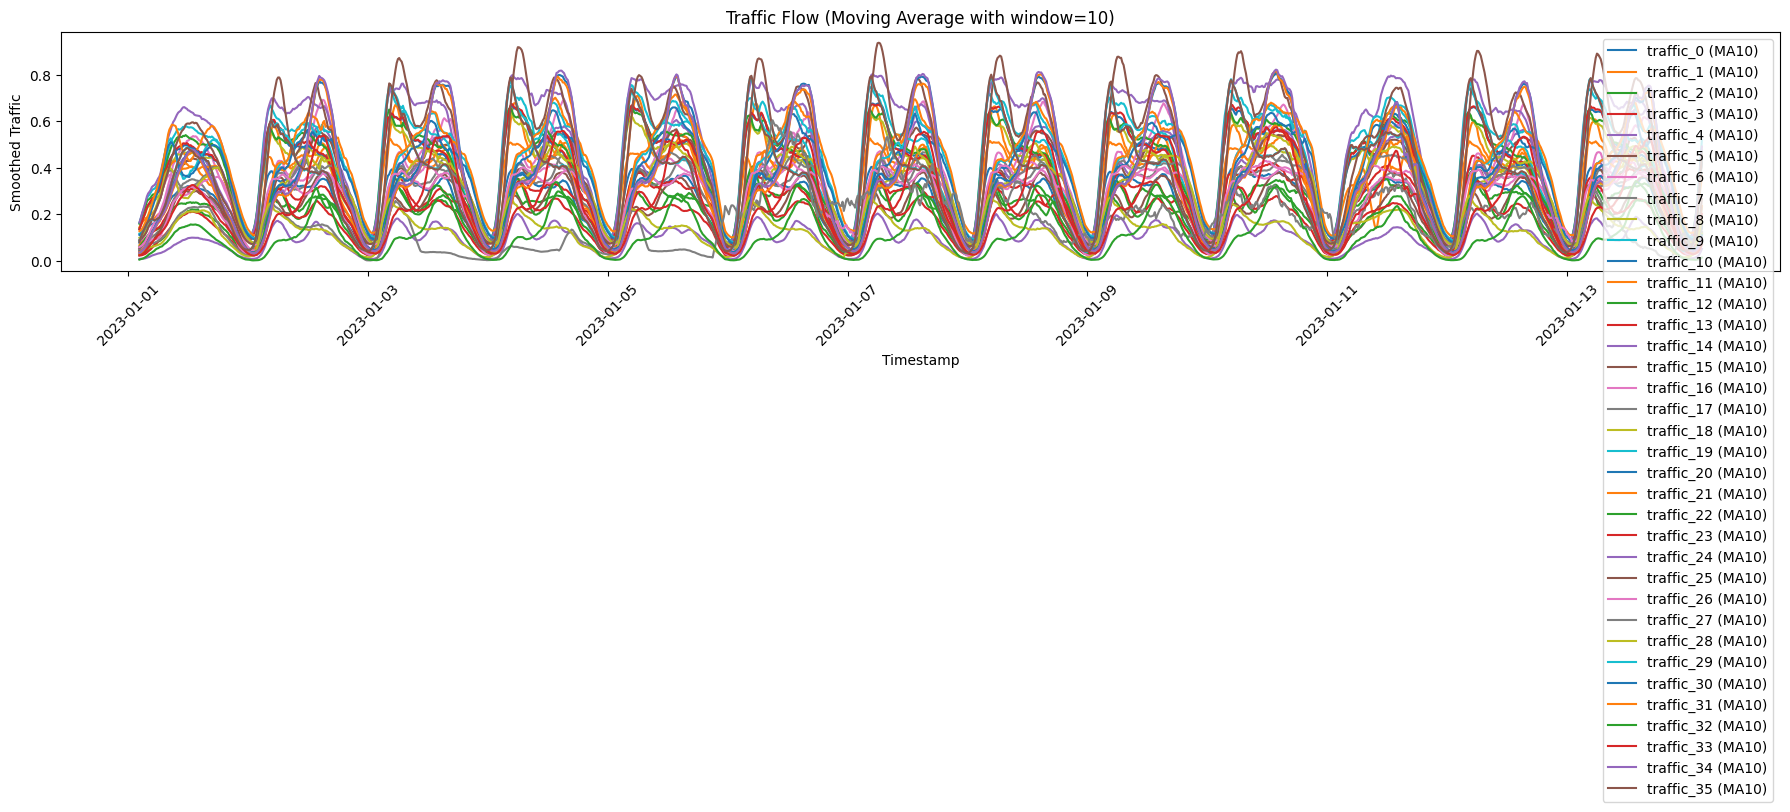

In [10]:

window_size = 10  # You can adjust window size

plt.figure(figsize=(18, 6))

for location in train_df.columns:
    smoothed = train_df[location].rolling(window=window_size).mean()
    plt.plot(train_df.index, smoothed, label=f"{location} (MA{window_size})")

plt.xlabel("Timestamp")
plt.ylabel("Smoothed Traffic")
plt.title(f"Traffic Flow (Moving Average with window={window_size})")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Area Plot for Stacked traffic

<ipython-input-11-742049eea112>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1800x600 with 0 Axes>

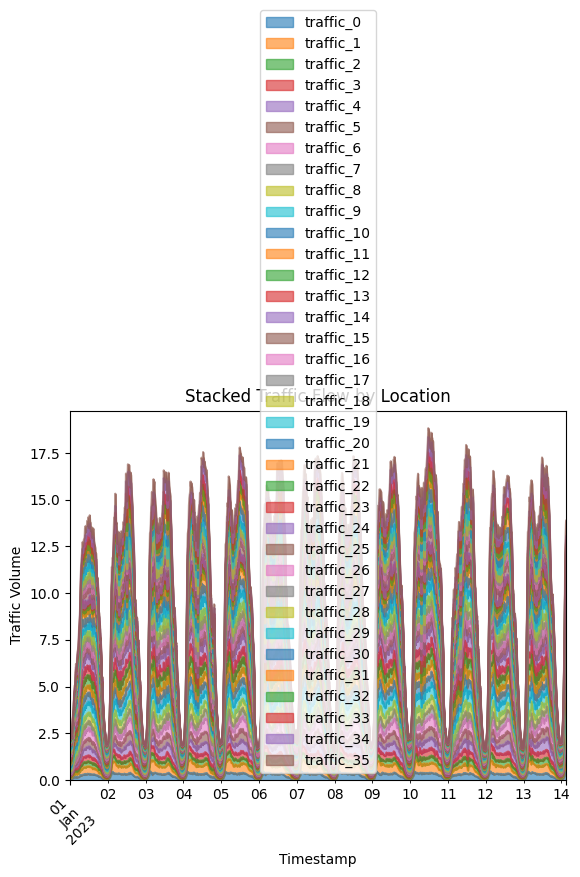

In [11]:
# Area plot for stacked traffic
plt.figure(figsize=(18, 6))
train_df.plot.area(stacked=True, alpha=0.6)
plt.title("Stacked Traffic Flow by Location")
plt.xlabel("Timestamp")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Box plot to see traffic distribution

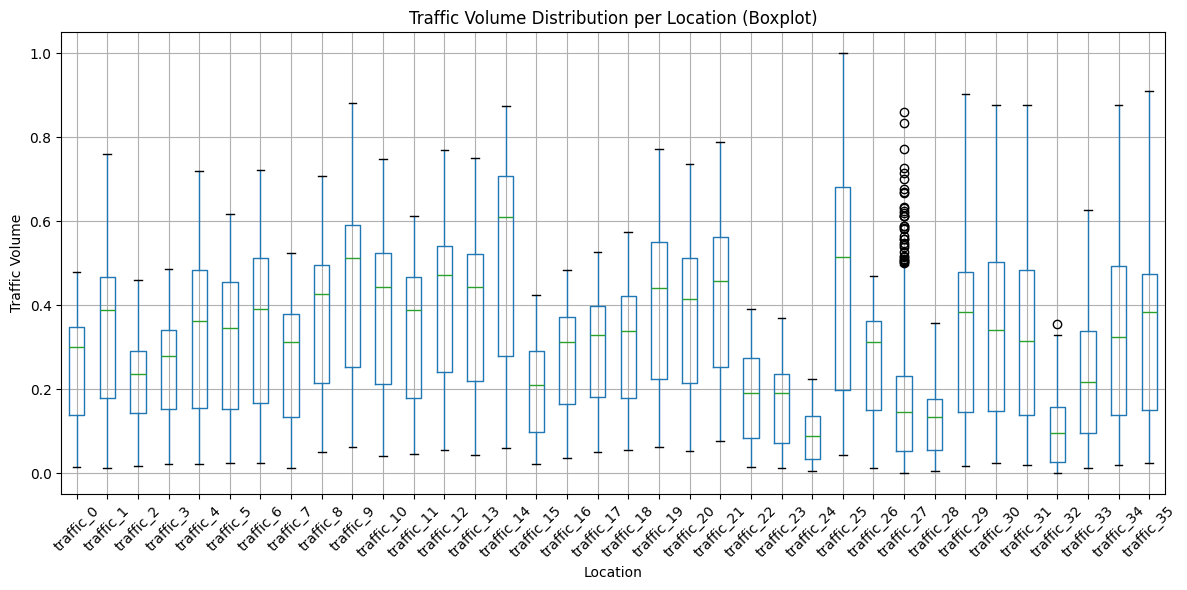

In [12]:

plt.figure(figsize=(12, 6))
train_df.boxplot()
plt.title("Traffic Volume Distribution per Location (Boxplot)")
plt.xlabel("Location")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Find and plot the peak times

<ipython-input-13-f892221ace39>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


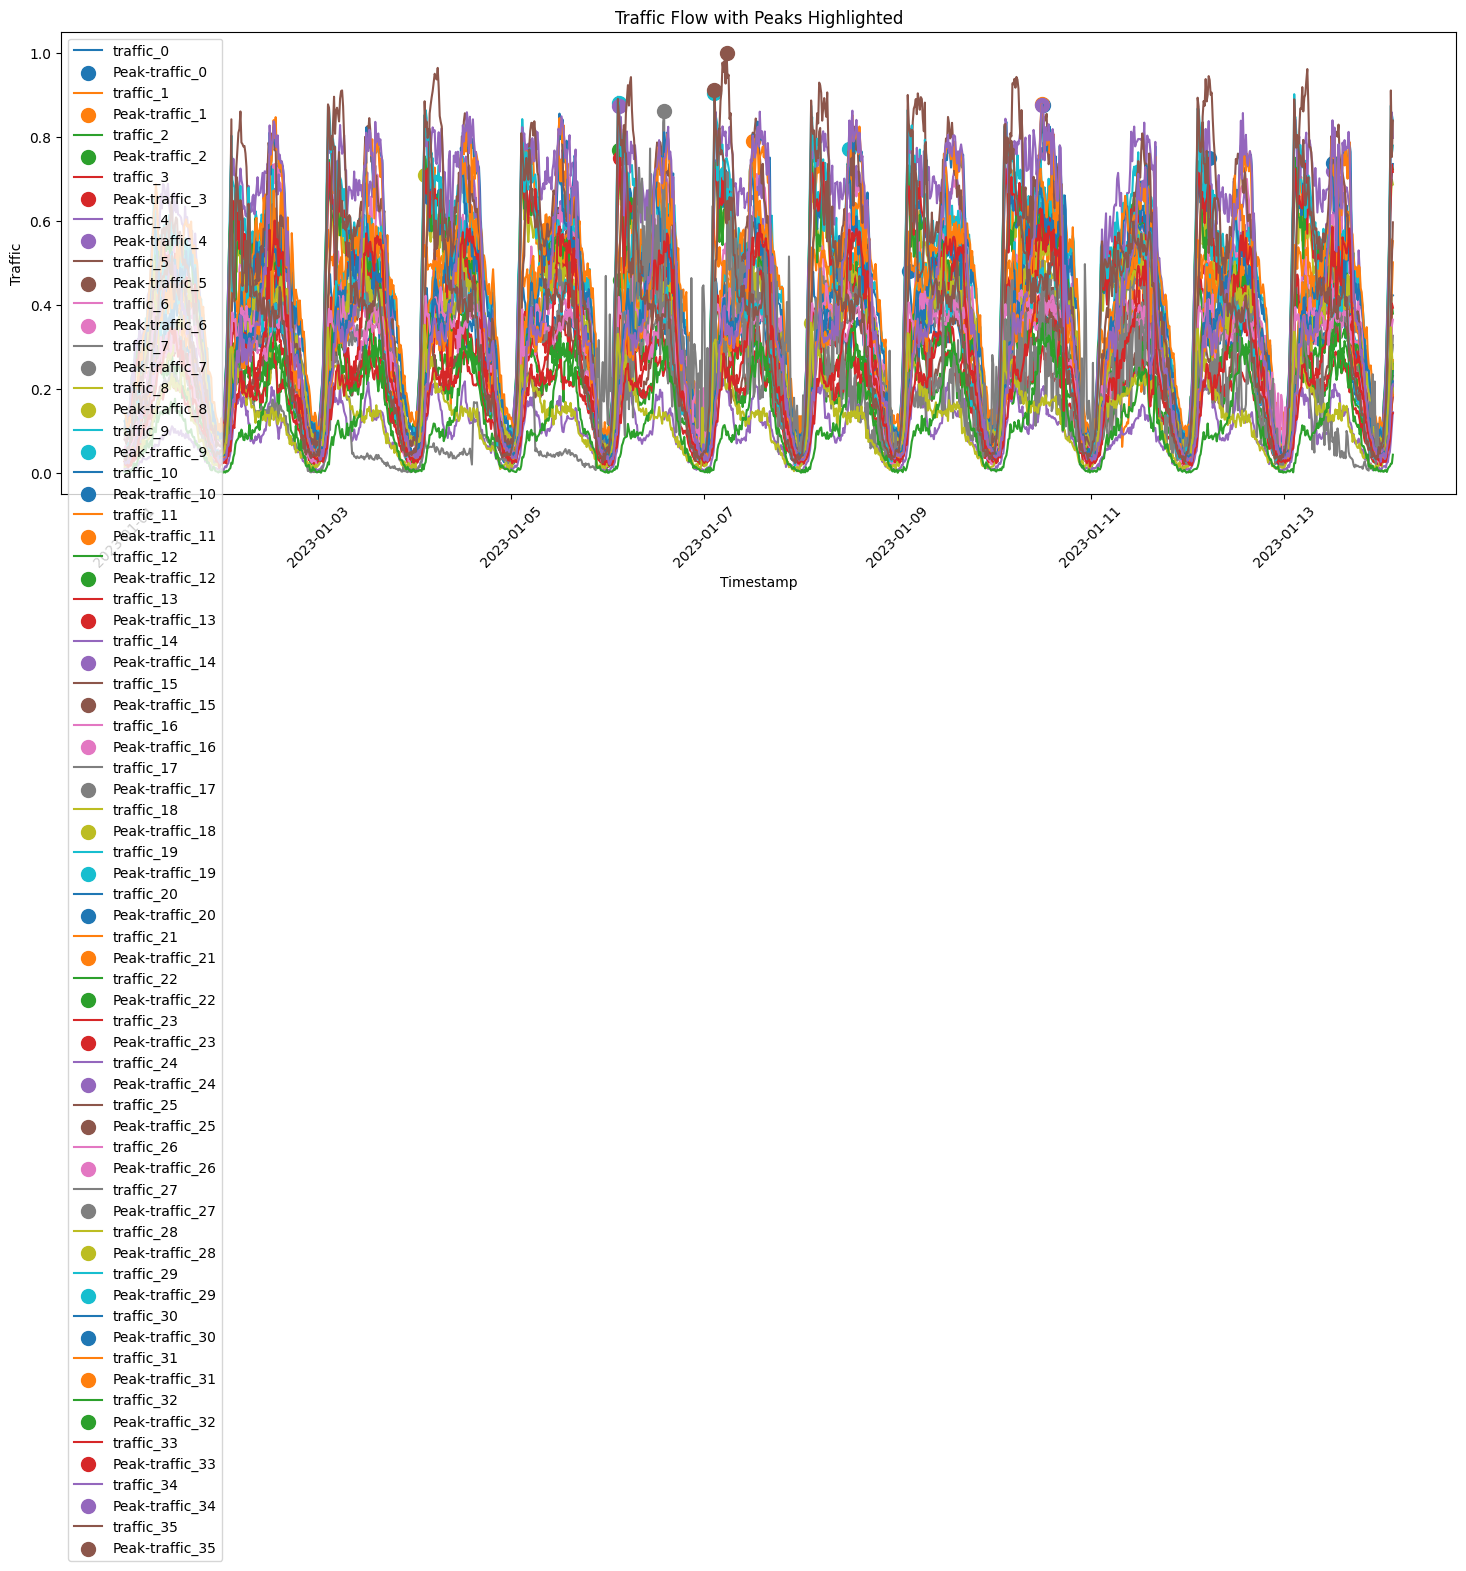

In [13]:

peak_times = train_df.idxmax()

plt.figure(figsize=(18, 6))
for location in train_df.columns:
    plt.plot(train_df.index, train_df[location], label=location)
    plt.scatter(peak_times[location], train_df.loc[peak_times[location], location],
                label=f'Peak-{location}', marker='o', s=100)

plt.xlabel("Timestamp")
plt.ylabel("Traffic")
plt.title("Traffic Flow with Peaks Highlighted")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# ✨ Animated Traffic Flow over Time (Matplotlib Animation)

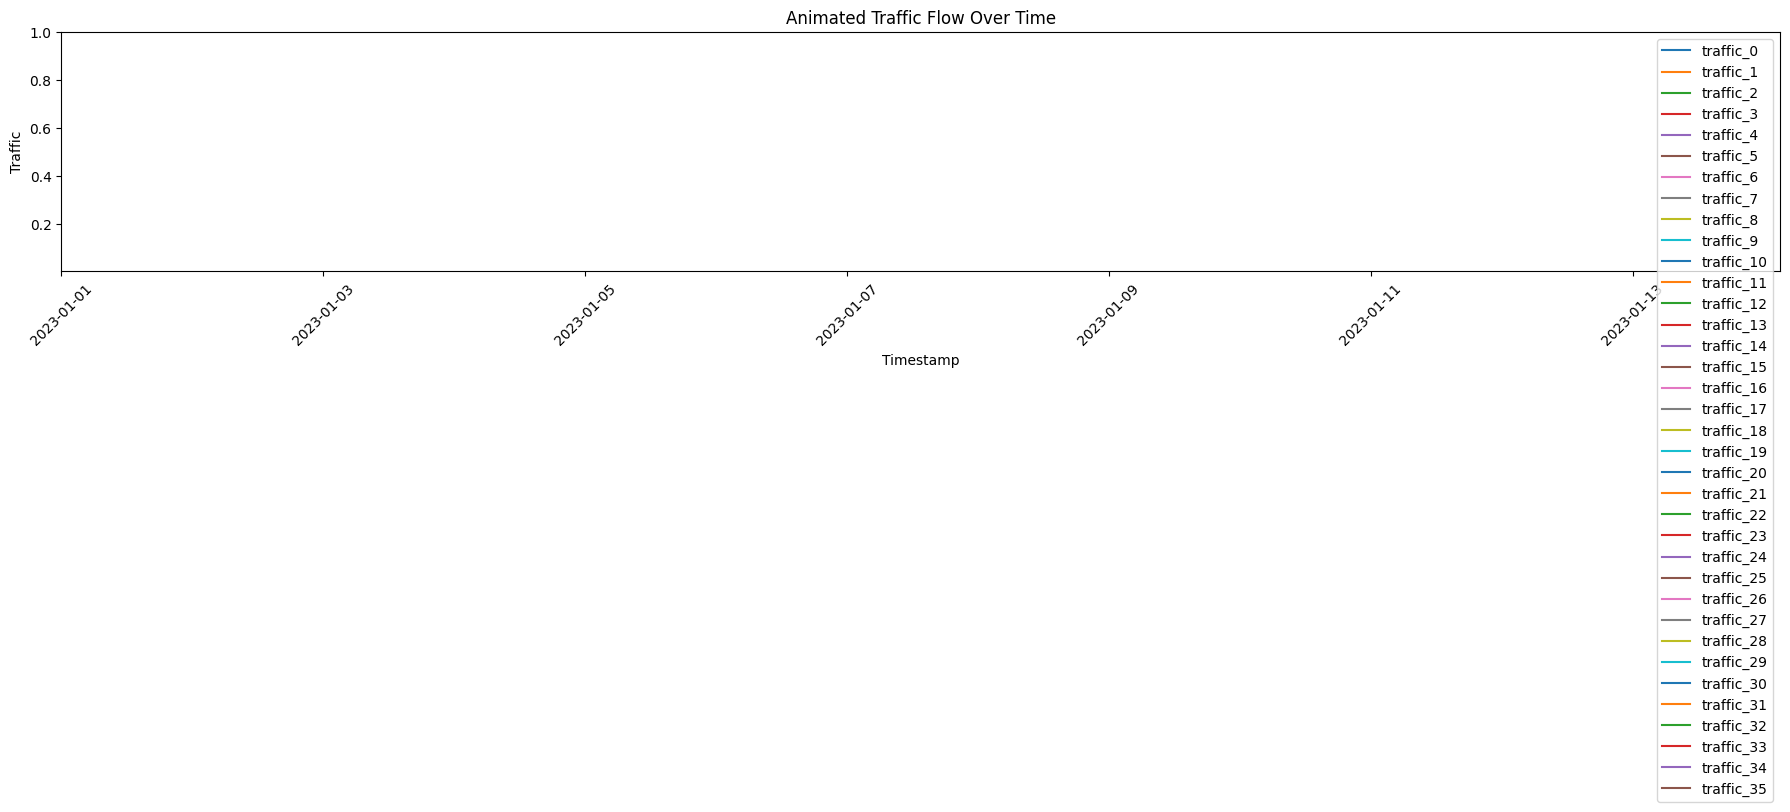

In [14]:
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(18, 6))
lines = {location: ax.plot([], [], label=location)[0] for location in train_df.columns}

ax.set_xlim(train_df.index.min(), train_df.index.max())
ax.set_ylim(train_df.min().min(), train_df.max().max())
ax.set_xlabel("Timestamp")
ax.set_ylabel("Traffic")
ax.set_title("Animated Traffic Flow Over Time")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

def animate(frame):
    for location, line in lines.items():
        line.set_data(train_df.index[:frame], train_df[location].iloc[:frame])
    return lines.values()

ani = animation.FuncAnimation(fig, animate, frames=len(train_df), interval=50, blit=True)
plt.show()


In [15]:
import plotly.express as px

# Convert index to column if needed
df_plotly = train_df.reset_index()

fig = px.line(df_plotly,
              x=df_plotly.columns[0],
              y=df_plotly.columns[1:],
              title="Interactive Traffic Flow Over Time",
              labels={'value': 'Traffic', 'variable': 'Location'})

fig.update_layout(autosize=False, width=1200, height=600)
fig.show()


In [16]:
import plotly.figure_factory as ff

corr_matrix = train_df.corr().round(2)

fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.values,
    colorscale='Viridis'
)

fig.update_layout(title="Interactive Correlation Heatmap", width=800, height=800)
fig.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to prepare shifted data for next-step prediction
def prepare_data(df, shift_steps=1):
    y = df.shift(-shift_steps)
    X = df.iloc[:-shift_steps].copy()
    y = y.iloc[:-shift_steps].copy()
    return X, y

# Assume train_df and test_df are already defined DataFrames
# Example:
# train_df = df.iloc[:int(0.8 * len(df))]
# test_df = df.iloc[int(0.8 * len(df)):]

# Prepare training data
X_train, y_train = prepare_data(train_df)

# Prepare testing data
X_test, y_test = prepare_data(test_df)

# Fit a Random Forest model for each location
models = {}
predictions = pd.DataFrame(index=X_test.index)

for location in train_df.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train[[location]], y_train[location])

    y_pred = model.predict(X_test[[location]])
    predictions[location] = y_pred

    r2 = r2_score(y_test[location], y_pred)
    rmse = np.sqrt(mean_squared_error(y_test[location], y_pred))

    print(f"Location: {location}")
    print(f"R2 Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-" * 30)

# Display first few predictions
print(predictions.head())


Location: traffic_0
R2 Score: 0.9268
RMSE: 0.0328
------------------------------
Location: traffic_1
R2 Score: 0.9386
RMSE: 0.0538
------------------------------
Location: traffic_2
R2 Score: 0.8911
RMSE: 0.0335
------------------------------
Location: traffic_3
R2 Score: 0.9250
RMSE: 0.0347
------------------------------
Location: traffic_4
R2 Score: 0.9606
RMSE: 0.0414
------------------------------
Location: traffic_5
R2 Score: 0.9533
RMSE: 0.0357
------------------------------
Location: traffic_6
R2 Score: 0.9499
RMSE: 0.0429
------------------------------
Location: traffic_7
R2 Score: 0.9418
RMSE: 0.0327
------------------------------
Location: traffic_8
R2 Score: 0.9240
RMSE: 0.0545
------------------------------
Location: traffic_9
R2 Score: 0.9275
RMSE: 0.0557
------------------------------
Location: traffic_10
R2 Score: 0.9202
RMSE: 0.0603
------------------------------
Location: traffic_11
R2 Score: 0.9329
RMSE: 0.0413
------------------------------
Location: traffic_12
R2 Sc

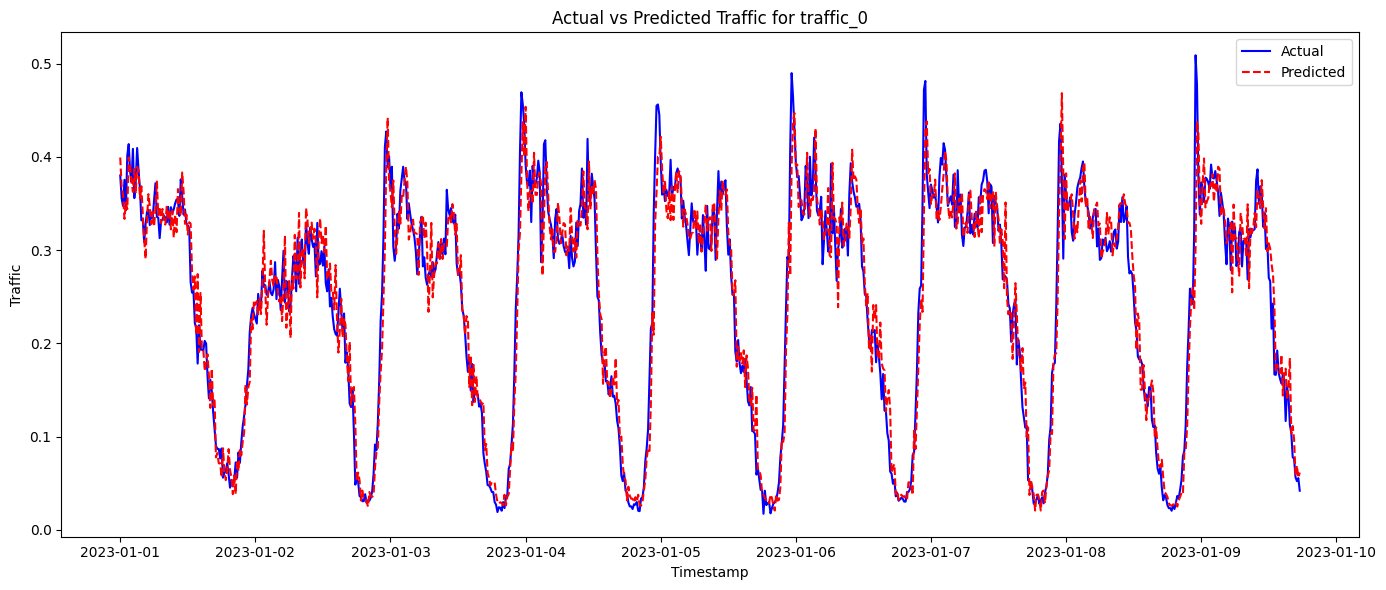

In [19]:
import matplotlib.pyplot as plt

location_to_plot = train_df.columns[0]  # Pick one location to visualize

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test[location_to_plot], label='Actual', color='blue')
plt.plot(predictions.index, predictions[location_to_plot], label='Predicted', color='red', linestyle='--')
plt.title(f"Actual vs Predicted Traffic for {location_to_plot}")
plt.xlabel("Timestamp")
plt.ylabel("Traffic")
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Function to prepare shifted data for next-step prediction
def prepare_data(df, shift_steps=1):
    y = df.shift(-shift_steps)
    X = df.iloc[:-shift_steps].copy()
    y = y.iloc[:-shift_steps].copy()
    return X, y

# Prepare training and testing data
# Replace with your actual DataFrame
# train_df = df.iloc[:int(0.8 * len(df))]
# test_df = df.iloc[int(0.8 * len(df)):]
X_train, y_train = prepare_data(train_df)
X_test, y_test = prepare_data(test_df)

# Fit an XGBoost model for each location
xgb_models = {}
xgb_predictions = pd.DataFrame(index=X_test.index)

for location in train_df.columns:
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    model.fit(X_train[[location]], y_train[location])

    y_pred = model.predict(X_test[[location]])
    xgb_predictions[location] = y_pred

    r2 = r2_score(y_test[location], y_pred)
    rmse = np.sqrt(mean_squared_error(y_test[location], y_pred))

    print(f"Location: {location}")
    print(f"[XGBoost] R2 Score: {r2:.4f}")
    print(f"[XGBoost] RMSE: {rmse:.4f}")
    print("-" * 30)

# Show prediction results
print(xgb_predictions.head())


Location: traffic_0
[XGBoost] R2 Score: 0.9373
[XGBoost] RMSE: 0.0304
------------------------------
Location: traffic_1
[XGBoost] R2 Score: 0.9527
[XGBoost] RMSE: 0.0472
------------------------------
Location: traffic_2
[XGBoost] R2 Score: 0.9063
[XGBoost] RMSE: 0.0310
------------------------------
Location: traffic_3
[XGBoost] R2 Score: 0.9359
[XGBoost] RMSE: 0.0320
------------------------------
Location: traffic_4
[XGBoost] R2 Score: 0.9634
[XGBoost] RMSE: 0.0398
------------------------------
Location: traffic_5
[XGBoost] R2 Score: 0.9602
[XGBoost] RMSE: 0.0330
------------------------------
Location: traffic_6
[XGBoost] R2 Score: 0.9582
[XGBoost] RMSE: 0.0392
------------------------------
Location: traffic_7
[XGBoost] R2 Score: 0.9499
[XGBoost] RMSE: 0.0304
------------------------------
Location: traffic_8
[XGBoost] R2 Score: 0.9367
[XGBoost] RMSE: 0.0498
------------------------------
Location: traffic_9
[XGBoost] R2 Score: 0.9417
[XGBoost] RMSE: 0.0500
---------------------

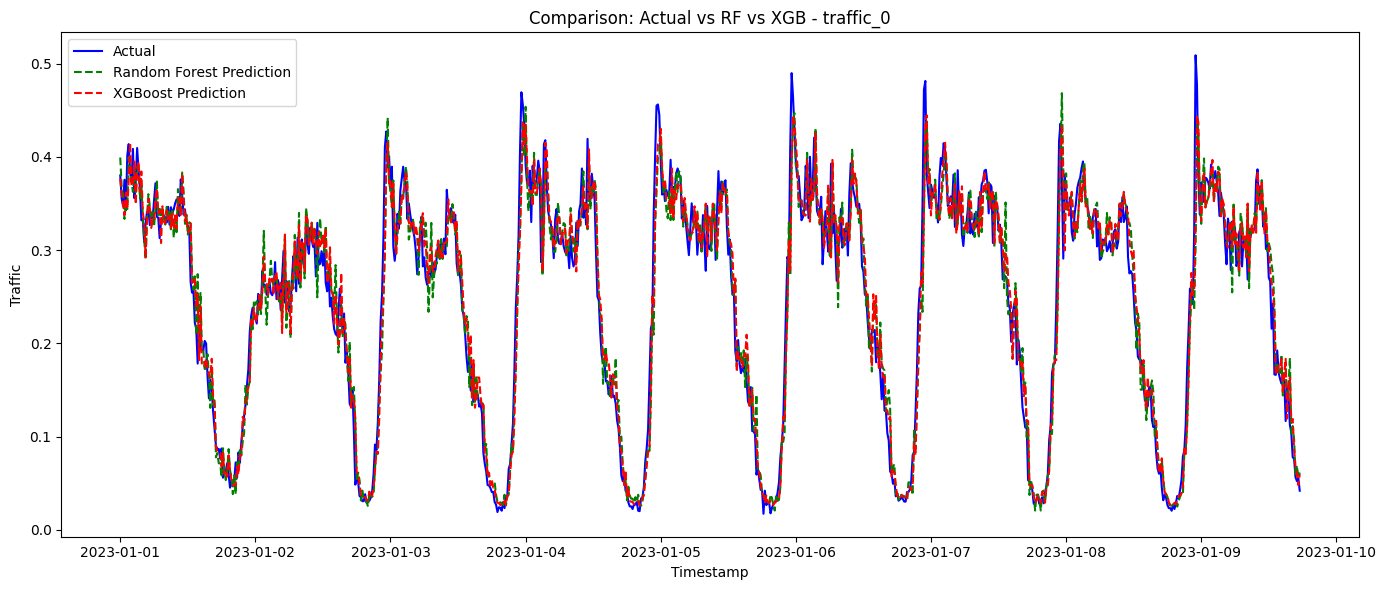

In [22]:
# Just an example comparison for one location
location_to_plot = train_df.columns[0]

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test[location_to_plot], label='Actual', color='blue')
plt.plot(predictions.index, predictions[location_to_plot], label='Random Forest Prediction', linestyle='--', color='green')
plt.plot(xgb_predictions.index, xgb_predictions[location_to_plot], label='XGBoost Prediction', linestyle='--', color='red')
plt.title(f"Comparison: Actual vs RF vs XGB - {location_to_plot}")
plt.xlabel("Timestamp")
plt.ylabel("Traffic")
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Rescale the data (important for deep learning models)
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
scaled_test_df = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns, index=test_df.index)

# Reshaping data for LSTM/GRU (samples, time steps, features)
def create_sequences(df, time_step=1):
    X, y = [], []
    for i in range(len(df) - time_step):
        X.append(df.iloc[i:(i + time_step)].values)
        y.append(df.iloc[i + time_step].values)
    return np.array(X), np.array(y)

# Set time_step (number of previous steps to predict the next one)
time_step = 10  # You can change this to experiment

X_train, y_train = create_sequences(scaled_train_df, time_step)
X_test, y_test = create_sequences(scaled_test_df, time_step)

# Add extra dimension for features (required for LSTM/GRU)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1251, 10, 36), y_train shape: (1251, 36)
X_test shape: (830, 10, 36), y_test shape: (830, 36)


# LSTM

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Build the LSTM model to predict multiple locations (36 features)
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=36))  # Output layer with 36 units for 36 locations
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize and train the model for all locations at once
lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions on test data
lstm_predictions = lstm_model.predict(X_test)

# Inverse scaling for all locations (36 features)
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)

# Inverse scale the actual values (y_test) for all locations
y_test_actual_inverse = scaler.inverse_transform(y_test)

# Evaluate the model
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual_inverse, lstm_predictions_inverse))
lstm_r2 = r2_score(y_test_actual_inverse, lstm_predictions_inverse)

print(f"LSTM RMSE: {lstm_rmse:.4f}")
print(f"LSTM R² Score: {lstm_r2:.4f}")



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1529
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0375
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0268
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0173
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0168
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0154
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0134
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0127
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
LSTM RMSE: 0.0566
LSTM R² Score: 0.8731


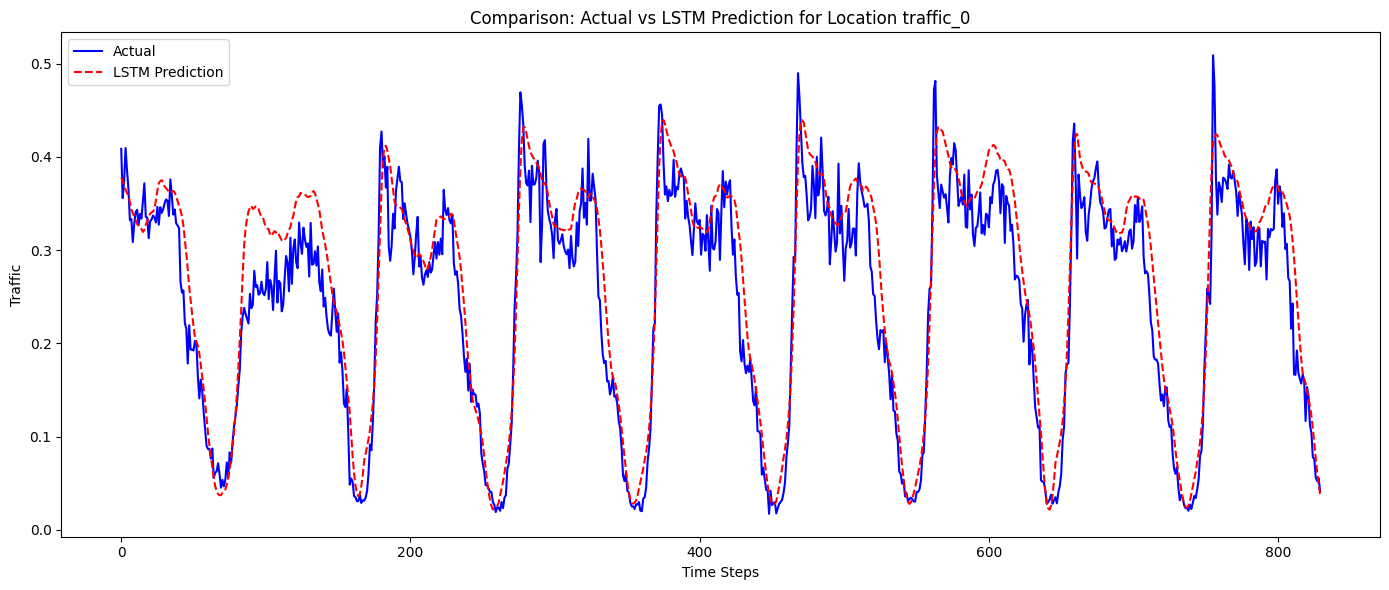

In [25]:
plt.figure(figsize=(14, 6))

# Pick one location to visualize (example: first location)
location_index = 0  # Change this to plot a different location
plt.plot(y_test_actual_inverse[:, location_index], label='Actual', color='blue')
plt.plot(lstm_predictions_inverse[:, location_index], label='LSTM Prediction', linestyle='--', color='red')

plt.title(f"Comparison: Actual vs LSTM Prediction for Location {train_df.columns[location_index]}")
plt.xlabel("Time Steps")
plt.ylabel("Traffic")
plt.legend()
plt.tight_layout()
plt.show()


# GRU

In [26]:
from keras.layers import GRU

# Build the GRU model to predict multiple locations (36 features)
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(GRU(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=36))  # Output layer with 36 units for 36 locations
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Initialize and train the GRU model for all locations at once
gru_model = build_gru_model((X_train.shape[1], X_train.shape[2]))

gru_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predictions on test data
gru_predictions = gru_model.predict(X_test)

# Inverse scaling for all locations (36 features)
gru_predictions_inverse = scaler.inverse_transform(gru_predictions)

# Inverse scale the actual values (y_test) for all locations
y_test_actual_inverse = scaler.inverse_transform(y_test)

# Evaluate the model
gru_rmse = np.sqrt(mean_squared_error(y_test_actual_inverse, gru_predictions_inverse))
gru_r2 = r2_score(y_test_actual_inverse, gru_predictions_inverse)

print(f"GRU RMSE: {gru_rmse:.4f}")
print(f"GRU R² Score: {gru_r2:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1515
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0376
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0274
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0200
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0191
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0165
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0147
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0150
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0132
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0121
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
GRU RMSE: 0.0652
GRU R² Score: 0.8476


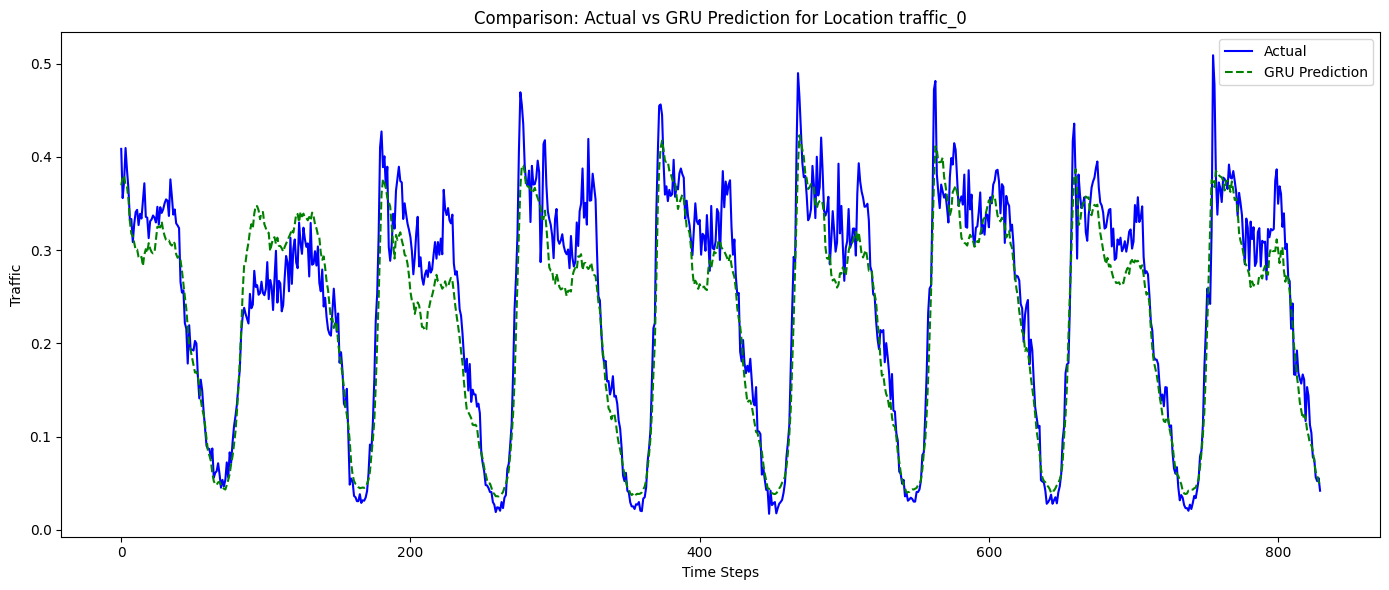

In [27]:
plt.figure(figsize=(14, 6))

# Pick one location to visualize (example: first location)
location_index = 0  # Change this to plot a different location
plt.plot(y_test_actual_inverse[:, location_index], label='Actual', color='blue')
plt.plot(gru_predictions_inverse[:, location_index], label='GRU Prediction', linestyle='--', color='green')

plt.title(f"Comparison: Actual vs GRU Prediction for Location {train_df.columns[location_index]}")
plt.xlabel("Time Steps")
plt.ylabel("Traffic")
plt.legend()
plt.tight_layout()
plt.show()
